# Spinzero - Jupyter Theme

## Input / Output
Code input and output. Input cells have line cell numbers. To show line numbers, press L. To hide, press Shift+L. To show line numbers in just one cell, highlight the cell and then press L.

In [5]:
# This sample notebook uses the following packages. Please make sure they're installed before running.
import time
import sys
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import cm
from skimage.transform import (hough_line, hough_line_peaks,probabilistic_hough_line)
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage import data
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

print('Last updated: %s' %time.strftime('%d/%m/%Y'))
print(sys.version)

Last updated: 13/01/2018
3.6.4 |Anaconda, Inc.| (default, Dec 21 2017, 15:39:08) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## Color Palette

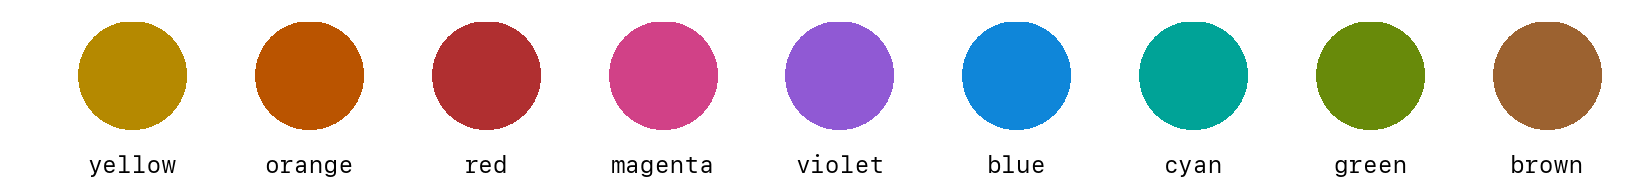

In [77]:
# RC Params
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.figsize'] = (14,1)

# Create a black image
img = np.full((1024,1024,3), 255, np.uint8)

# Color Palette
colors = {'yellow': [181,137,0], 'orange' : [186,84,0], 'red' : [176,47,48], \
         'magenta': [209,65,135], 'violet': [144,89,212], 'blue': [15,134,217], \
         'cyan': [0,163,151], 'green': [104,138,10], 'brown': [156,98,48]}

fig = plt.figure()
for i, (color, rgb) in enumerate(colors.items()):
    axis = fig.add_subplot(1,9,i+1)
    cv2.circle(img, (512, 512), 512, (rgb[0], rgb[1], rgb[2]), -1)
    plt.title(color, y=-0.50)
    plt.axis('off')
    plt.imshow(img);

## Fonts
Spinzero theme uses two main typefaces. Jupyter notebooks are typically used for academic or professional use and there is nothing more classic than the good ol' *Computer Modern* fonts. These fonts give Jupyter notebooks a classic authoritative aesthetic (CM fonts are widely used in LaTeX based journal papers).

`For code, Spinzero theme uses Apple's SF Mono. Personally, I find it very pleasing and it has some nice features such as a slashed 0 and vertical quote marks - "'. Technically Apple's SF Mono is only allowed for us on Apple computers, so please choose a different font if you're not on macOS as it voilates Apple's EULA. If you delete SF mono from the font's folder, it will default to whatever your system monospaced font is set to.`

# Code Sample

Majority of the work done in Jupyter notebooks is writing code. Here is what python looks like in Spinzero.

In [36]:
"""
Contributed by izanbf1803.
Example:
-------------------------------------------------------------------------------------------------
    Code:
        |   exp = "2452 * (3 * 6.5 + 1) * 6 / 235"
        |   print("Expression:", exp)
        |   print("Parsed expression:", mp.parse(exp))
        |   print("Evaluation result:", mp.evaluate(exp))
    Output:
        |   Expression: 2452 * (3 * 6 + 1) * 6 / 235
        |   Parsed expression: ['2452', '*', '(', '3', '*', '6', '+', '1', ')', '*', '6', '/', '235']
        |   Evaluation result: 1189.4808510638297
-------------------------------------------------------------------------------------------------
"""

from collections import deque
import re

numeric_value = re.compile('\d+(\.\d+)?')

__operators__ = "+-/*"
__parenthesis__ = "()"
__priority__ = {
    '+': 0,
    '-': 0,
    '*': 1,
    '/': 1,
}

def is_operator(token):
    """
    Check if token it's a operator
    token Char: Token
    """
    return token in __operators__

def higher_priority(op1, op2):
    """
    Check if op1 have higher priority than op2
    op1 Char: Operation Token 1
    op2 Char: Operation Token 2
    """
    return __priority__[op1] >= __priority__[op2]

def calc(n2, n1, operator):
    """
    Calculate operation result
    n2 Number: Number 2
    n1 Number: Number 1
    operator Char: Operation to calculate
    """
    if operator == '-': return n1 - n2
    elif operator == '+': return n1 + n2
    elif operator == '*': return n1 * n2
    elif operator == '/': return n1 / n2
    return 0

def apply_operation(op_stack, out_stack):
    """
    Apply operation to the first 2 items of the output queue
    op_stack Deque (reference)
    out_stack Deque (reference)
    """
    out_stack.append(calc(out_stack.pop(), out_stack.pop(), op_stack.pop()))

def parse(expression):
    """
    Return array of parsed tokens in the expression
    expression String: Math expression to parse in infix notation
    """
    result = []
    current = ""
    for i in expression:
        if i.isdigit() or i == '.':
            current += i
        else:
            if len(current) > 0:
                result.append(current)
                current = ""
            if i != ' ':
                result.append(i)
    if len(current) > 0:
        result.append(current)
    return result

def evaluate(expression):
    """
    Calculate result of expression
    expression String: The expression
    type Type (optional): Number type [int, float]
    """
    op_stack  = deque() # operator stack
    out_stack = deque() # output stack (values)
    for token in parse(expression):
        if numeric_value.match(token):
            out_stack.append(float(token))
        elif token == '(':
            op_stack.append(token)
        elif token == ')':
            while len(op_stack) > 0 and op_stack[-1] != '(':
                apply_operation(op_stack, out_stack)
            op_stack.pop() # Remove remaining '('
        else: # is_operator(token)
            while len(op_stack) > 0 and is_operator(op_stack[-1]) and higher_priority(op_stack[-1], token):
                apply_operation(op_stack, out_stack)
            op_stack.append(token)

    while len(op_stack) > 0:
        apply_operation(op_stack, out_stack)

    return out_stack[-1]

# An exhibit of Markdown

This note demonstrates some of what [Markdown][1] is capable of doing.

*Note: Feel free to play with this page. Unlike regular notes, this doesn't automatically save itself.*

## Basic formatting

Paragraphs can be written like so. A paragraph is the basic block of Markdown. A paragraph is what text will turn into when there is no reason it should become anything else.

Paragraphs must be separated by a blank line. Basic formatting of *italics* and **bold** is supported. This *can be **nested** like* so.

## Headings

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
##### Heading 5
###### Heading 6

There are six levels of headings. They correspond with the six levels of HTML headings. You've probably noticed them already in the page. Each level down uses one more hash character.

### Headings *can* also contain **formatting**

### They can even contain `inline code`

Of course, demonstrating what headings look like messes up the structure of the page.

I don't recommend using more than three or four levels of headings here, because, when you're smallest heading isn't too small, and you're largest heading isn't too big, and you want each size up to look noticeably larger and more important, there there are only so many sizes that you can use.

## Lists

### Ordered list

1. Item 1
2. A second item
3. Number 3
4. Ⅳ

*Note: the fourth item uses the Unicode character for [Roman numeral four][2].*

### Unordered list

* An item
* Another item
* Yet another item
* And there's more...

## Paragraph modifiers

### Code block

    Code blocks are very useful for developers and other people who look at code or other things that are written in plain text. As you can see, it uses a fixed-width font.

You can also make `inline code` to add code into other things.

### Quote

> Here is a quote. What this is should be self explanatory. Quotes are automatically indented when they are used.

## URLs

URLs can be made in a handful of ways:

* A named link to [MarkItDown][3]. The easiest way to do these is to select what you want to make a link and hit `Ctrl+L`.
* Another named link to [MarkItDown](http://www.markitdown.net/)
* Sometimes you just want a URL like <http://www.markitdown.net/>.

## Horizontal rule

A horizontal rule is a line that goes across the middle of the page.

---

It's sometimes handy for breaking things up.

## Images

Markdown can also contain images.

![Van Gogh](figure/van_gogh.png)

## Markdown Resources

There's actually a lot more to Markdown than this. See the official [introduction][4] and [syntax][5] for more information. However, be aware that this is not using the official implementation, and this might work subtly differently in some of the little things.


* [1]: http://daringfireball.net/projects/markdown/
* [2]: http://www.fileformat.info/info/unicode/char/2163/index.htm
* [3]: http://www.markitdown.net/
* [4]: http://daringfireball.net/projects/markdown/basics
* [5]: http://daringfireball.net/projects/markdown/syntax

# MathJax Equations

$x = {-b \pm \sqrt{b^2-4ac} \over 2a}.$


$\frac{d^2w}{dx^2} - \frac{4u^2w}{l^2}
   = \frac{-qlx}{2D}+\frac{qx^2}{2D}$


$\frac{\partial u}{\partial t}
   = h^2 \left( \frac{\partial^2 u}{\partial x^2}
      + \frac{\partial^2 u}{\partial y^2}
      + \frac{\partial^2 u}{\partial z^2} \right)$
      
In more mathematical terms, our goal is to compute the best fit to *n* points $(x_i, y_i)$ with $i=1,2,...n,$ via linear equation of the form  
$f(x) = a\cdot x + b$.  

$(\nabla_X Y)^k = X^i (\nabla_i Y)^k = X^i \left( \frac{\partial Y^k}{\partial x^i} + \Gamma_{im}^k Y^m \right)$


We further have to assume that the y-component is  functionally dependent on the x-component.  
In a cartesian coordinate system, $b$ is the intercept of the straight line with the y-axis, and $a$ is the slope of this line.

In order to obtain the parameters for the linear regression line for a set of multiple points, we can re-write the problem as matrix equation  
$\pmb X \; \pmb a = \pmb y$

$\Rightarrow\Bigg[ \begin{array}{cc}
x_1 & 1  \\
... & 1 \\
x_n & 1  \end{array} \Bigg]$
$\bigg[ \begin{array}{c}
a  \\
b \end{array} \bigg]$
$=\Bigg[ \begin{array}{c}
y_1   \\
...  \\
y_n  \end{array} \Bigg]$

With a little bit of calculus, we can rearrange the term in order to obtain the parameter vector $\pmb a = [a\;b]^T$

$\Rightarrow \pmb a = (\pmb X^T \; \pmb X)^{-1} \pmb X^T \; \pmb y$

The more classic approach to obtain the slope parameter $a$ and y-axis intercept $b$ would be:

$a = \frac{S_{x,y}}{\sigma_{x}^{2}}\quad$  (slope)

$b = \bar{y} - a\bar{x}\quad$ (y-axis intercept)

where 

$S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})\quad$ (covariance)

$\sigma{_x}^{2} = \sum_{i=1}^{n} (x_i - \bar{x})^2\quad$ (variance)

# Dataframes

I've chosen a post-it note color for the table background so that dataframe output standsout, especially when scrolling through a long notebook.

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

NameError: name 'load_iris' is not defined

In [1]:
iris_df.head()

NameError: name 'iris_df' is not defined

In [2]:
iris_df.describe()

NameError: name 'iris_df' is not defined

# Plotting and Visualization

In [80]:
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['font.family'] = 'SF Mono'
mpl.rcParams.update({'font.size': 12})

# Import image
color_img = data.imread('figure/van_gogh.png')
gray_img = data.imread('figure/van_gogh.png', as_grey = True)

# RGB channels
red_img = color_img.copy()
red_img[:,:,1] = 0
red_img[:,:,2] = 0

blue_img = color_img.copy()
blue_img[:,:,0] = 0
blue_img[:,:,1] = 0

green_img = color_img.copy()
green_img[:,:,0]=0
green_img[:,:,2]=0

red_channel = red_img[:,:,0]
green_channel = green_img[:,:,1]
blue_channel = blue_img[:,:,2]

gray_biased =  (rgb2gray(color_img)*255).astype('uint8')
gray_avg = np.mean(np.array([red_channel, green_channel, blue_channel]), axis=0).astype('uint8')
gray_true = np.mean(np.array([red_channel, green_channel/2, blue_channel]), axis=0).astype('uint8')

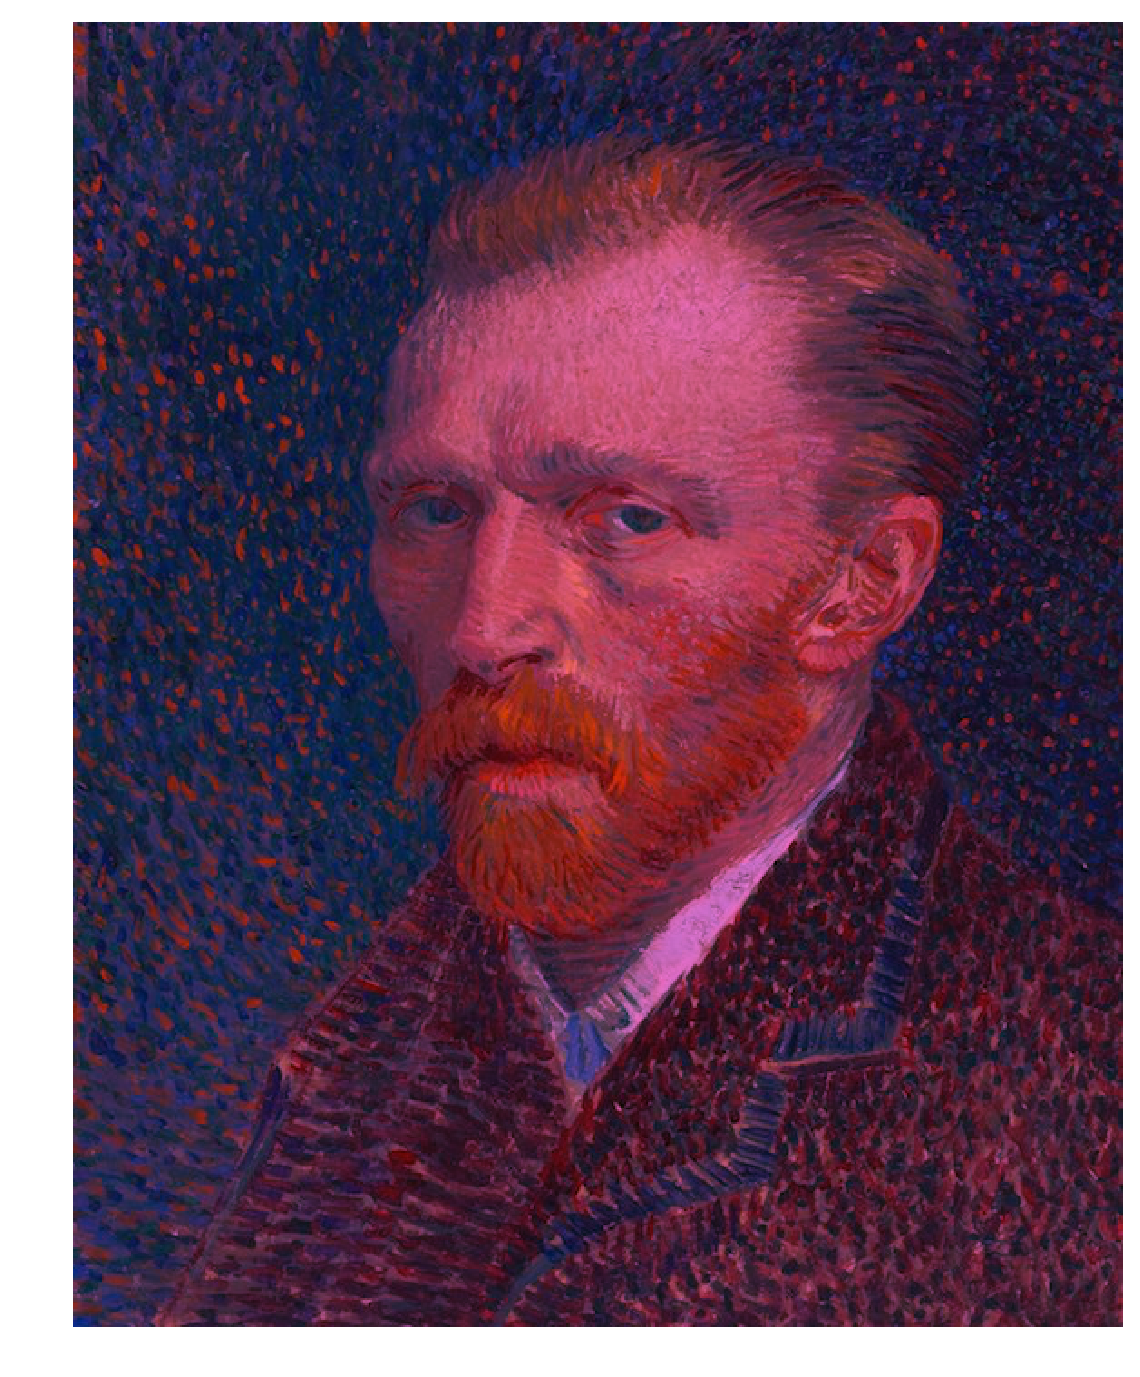

In [81]:
color_true = color_img.copy()
color_true[:,:,0] = color_true[:,:,0]
color_true[:,:,1] = color_true[:,:,1]/2
color_true[:,:,2] = color_true[:,:,2]

true_plt = plt.imshow(color_true)
plt.axis('off')
plt.show()

In [82]:
gray_avg = color_img[:,:,0]/3 + color_img[:,:,1]/3  + color_img[:,:,2]/3
rec_709 = color_img[:,:,0]*0.2125 + color_img[:,:,1]*0.7154  + color_img[:,:,2]*0.0721
bt_2020 = color_img[:,:,0]*0.2627 + color_img[:,:,1]*0.6780  + color_img[:,:,2]*0.0593

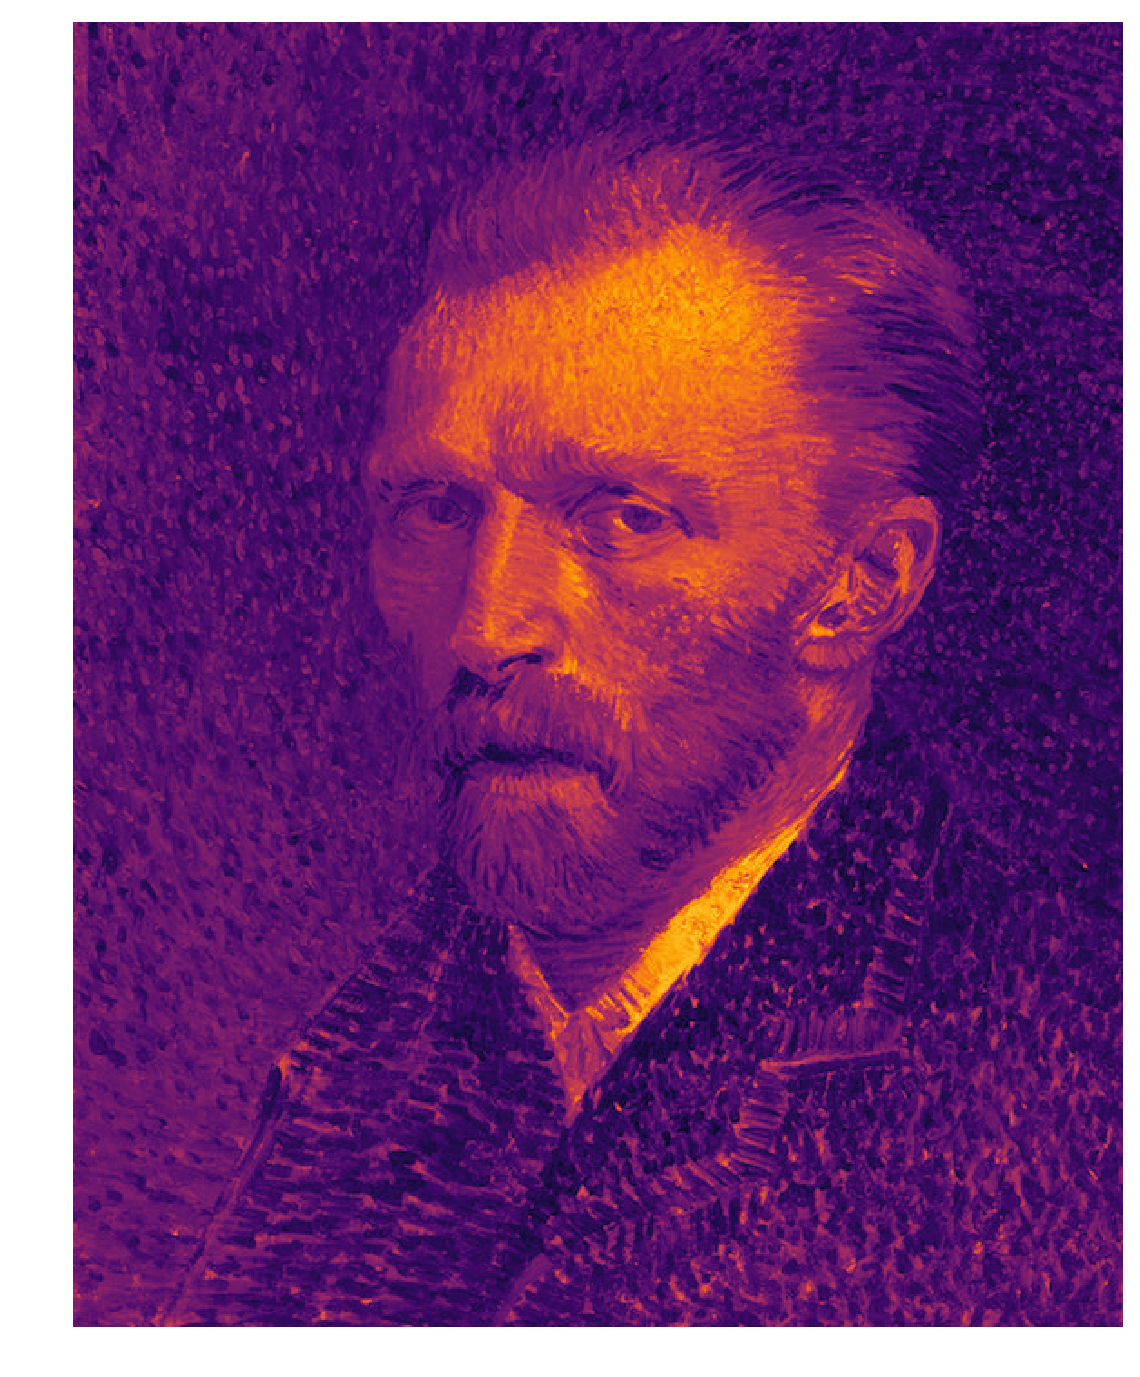

In [83]:
rec_709 = plt.imshow(rec_709, cmap="inferno", vmin=0, vmax=255)
plt.axis('off')
plt.show(rec_709)

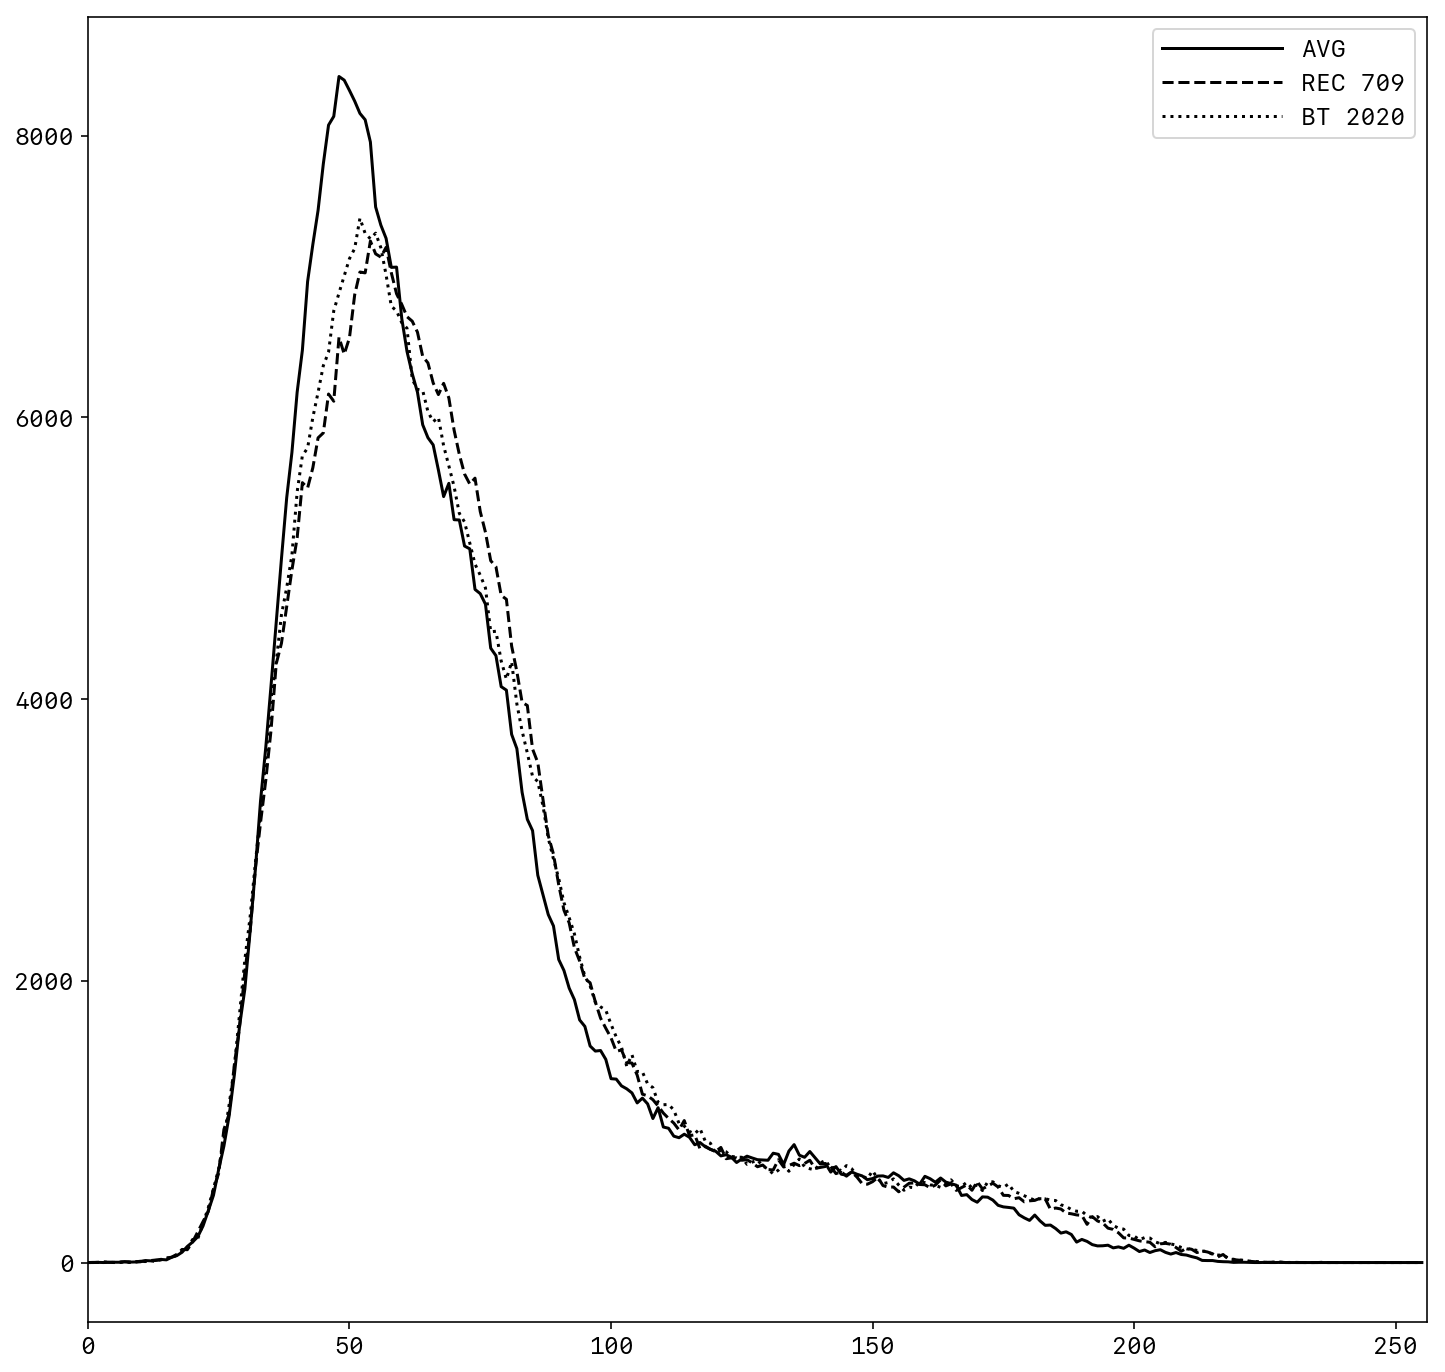

In [84]:
color_img = data.imread('figure/van_gogh.png')

gray_avg = color_img[:,:,0]/3 + color_img[:,:,1]/3  + color_img[:,:,2]/3
rec_709 = color_img[:,:,0]*0.2125 + color_img[:,:,1]*0.7154  + color_img[:,:,2]*0.0721
bt_2020 = color_img[:,:,0]*0.2627 + color_img[:,:,1]*0.6780  + color_img[:,:,2]*0.0593

gray_avg_int = np.around(gray_avg).astype('uint8')
rec_709_int = np.around(rec_709).astype('uint8')
bt_2020_int = np.around(bt_2020).astype('uint8')

hist_gray_avg = cv2.calcHist([gray_avg_int],[0],None,[256],[0,256])
hist_rec_709 = cv2.calcHist([rec_709_int],[0],None,[256],[0,256])
hist_bt_2020 = cv2.calcHist([bt_2020_int],[0],None,[256],[0,256])

fig, ax = plt.subplots()
ax.plot(hist_gray_avg, color='k', linestyle='-', label='AVG')
ax.plot(hist_rec_709, color='k', linestyle='--', label='REC 709')
ax.plot(hist_bt_2020, color='k', linestyle=':', label='BT 2020')
ax.set_xlim([0,256])
plt.legend(loc='upper right', handlelength=5)
plt.show()

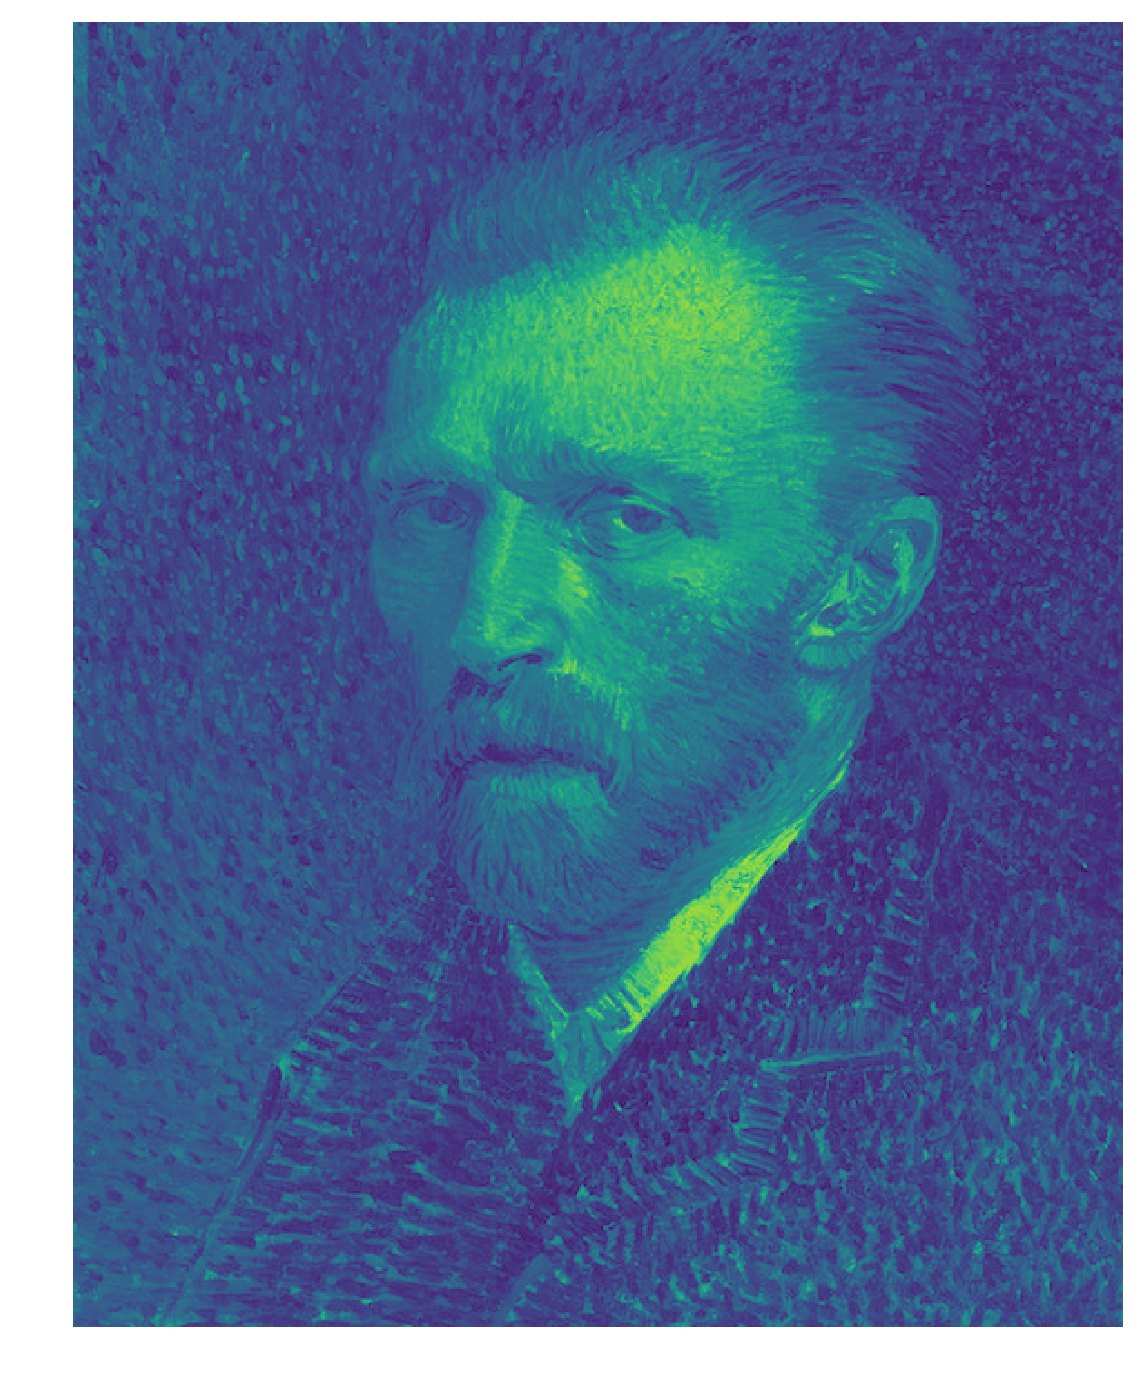

In [85]:
color_img = data.imread('figure/van_gogh.png')
bt_2020_img = color_img[:,:,0]*0.2627 + color_img[:,:,1]*0.6780  + color_img[:,:,2]*0.0593
bt_2020_img = np.around(bt_2020_img).astype('uint8')

fig, ax = plt.subplots()
ax.imshow(bt_2020, cmap='viridis', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# Errors and Exceptions

In [86]:
import thislibrarydoesnotexist

ModuleNotFoundError: No module named 'thislibrarydoesnotexist'

In [87]:
undef = 1/0

ZeroDivisionError: division by zero

# Credits
Some of the maths material is taken from notebooks by [Sebastian Raschka](http://www.sebastianraschka.com)

Dataframe sample is taken from: https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset

Code sample is from: https://github.com/keon/algorithms/blob/master/calculator/math_parser.py

This sample notebook is created by: [Neil Panchal](http://neil.panchal.io)